In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [30]:
iris = load_iris()

In [31]:
X = iris.data
Y = iris.target
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [68]:
model = Sequential()
model.add(Dense(16, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

# model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),              
             metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [69]:
history = model.fit(x_train, y_train, epochs=70, batch_size=64, verbose=0)

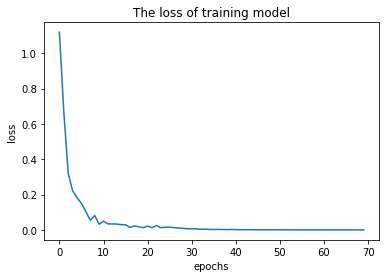

In [70]:
# history.history
plt.plot(history.history['loss'])
plt.title('The loss of training model')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

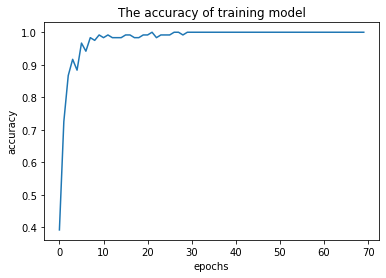

In [71]:
plt.plot(history.history['categorical_accuracy'])
plt.title('The accuracy of training model')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [72]:
score = model.evaluate(x_test, y_test)
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])
# np.argmax(model.predict(x_test), axis=1)

1/1 [==============================] - 0s 104ms/step - loss: 0.4949 - categorical_accuracy: 0.9000
Test Loss:  0.4949049651622772
Test Accuracy:  0.8999999761581421


In [73]:
score

[0.4949049651622772, 0.8999999761581421]